# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Syarifah Alexandria
- **Email:** syarifah.alex@student.ub.ac.od
- **ID Dicoding:** andriia

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan kondisi kualitas udara berdasarkan data PM10 pada setiap bulannya di tahun 2015 yang terjadi di Stasiun Changping?
- Bagaimana perbandingan kadar karbon monoksida pada udara di Stasiun Changping dan Stasiun Dongsi
- Bagaimana hubungan antara tingkat polusi udara (diwakili oleh PM2.5 dan PM10) dengan suhu udara (TEMP) pada bulan November 2014 hingga Januari 2015 pada Stasiun Dongsi

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install numpy pandas scipy matplotlib seaborn streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import calendar 
from IPython.display import display

## Data Wrangling

### Gathering Data

1. Membaca data csv dari Stasiun Changping dan menyimpannya sebagai dataframe Changping_df

In [3]:
Changping_df = pd.read_csv(r"C:\Users\syari\Document\KULIAH\Semester_6_BANGKIT\submission\data\PRSA_Data_Changping_20130301-20170228.csv")
Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


2. Membaca data csv dari Stasiun Changping dan menyimpannya sebagai dataframe Dongsi_df

In [4]:
Dongsi_df = pd.read_csv(r"C:\Users\syari\Document\KULIAH\Semester_6_BANGKIT\submission\data\PRSA_Data_Dongsi_20130301-20170228.csv")
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


### Assessing Data

#### Assessing Data from Changping Station

1. Mendapatkan informasi jumlah data yang ada pada setiap fitur dan tipe datanya di dataframe Stasiun Changping

In [5]:
Changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


2. Mendapatkan informasi jumlah data yang bernilai null pada setiap features data Stasiun Changping

In [6]:
Changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

3. Mendapatkan informasi jumlah data yang terduplikasi pada data Stasiun Changping

In [7]:
print("Jumlah duplikasi: ", Changping_df.duplicated().sum())

Jumlah duplikasi:  0


4. Mendapatkan informasi sum dari data, mean, standar deviasi, etc dari data Stasiun Changping

In [8]:
Changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Assessing Data from Dongsi Station

1. Mendapatkan informasi jumlah data yang ada pada setiap fitur dan tipe datanya di dataframe Stasiun Dongsi

In [9]:
Dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


2. Mendapatkan informasi jumlah data yang bernilai null pada setiap features data Stasiun Dongsi

In [10]:
Dongsi_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

3. Mendapatkan informasi jumlah data yang terduplikasi pada data Stasiun Dongsi

In [11]:
print("Jumlah duplikasi: ", Dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


4. Mendapatkan informasi sum dari data, mean, standar deviasi, etc dari data Stasiun Dongsi

In [12]:
Dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Cleaning Data

#### Cleaning Data dari Dataframe Changping Station

1. Mengisi nilai null pada Stasiun Changping menggunakan metode interpolasi, karena database berbasis waktu

In [13]:
# Menggunakan metode interpolasi untuk mengisi nilai null
Changping_df = Changping_df.interpolate(method='linear', axis=0).round(2)

# Menyimpan kembali hasil interpolasi ke dataframe yang sama
Changping_df.to_csv(r'C:\Users\syari\Document\KULIAH\Semester_6_BANGKIT\submission\dashboard\main_data_Changping.csv', index=False)

# Mencetak dataframe yang sudah diisi nilai null
print(Changping_df)

C:\Users\syari\AppData\Local\Temp\ipykernel_21376\3383731806.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Changping_df = Changping_df.interpolate(method='linear', axis=0).round(2)


          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0  33.0   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      

2. Mendapatkan informasi jumlah data yang bernilai null pada setiap features data Stasiun Changping, seluruh data numerik sudah terisi dengan nilai 

In [14]:
Changping_df.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

3. Mendapatkan informasi jumlah value outliers pada Stasiun Changping dengan nilai standar deviasi


In [15]:
def detect_outliers_std(df, threshold=3):
    outliers = pd.DataFrame()  # DataFrame baru untuk menyimpan outliers
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Hanya pilih kolom numerik
            mean = df[col].mean()
            std_dev = df[col].std()
            lower_bound = mean - threshold * std_dev
            upper_bound = mean + threshold * std_dev
            col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            if not col_outliers.empty:
                outliers = pd.concat([outliers, col_outliers])  # Menambahkan outliers ke DataFrame baru
                print("Outlier values for", col, ":", col_outliers[col].tolist())
    return outliers

# Deteksi outlier
outliers_df = detect_outliers_std(Changping_df)

# Mencetak dataframe outliers
print(outliers_df)


Outlier values for PM2.5 : [293.0, 302.0, 312.0, 339.0, 326.0, 290.0, 443.0, 289.0, 298.0, 301.0, 308.0, 374.0, 330.0, 340.0, 349.0, 350.0, 368.0, 403.0, 394.0, 338.0, 379.0, 291.0, 297.0, 310.0, 304.0, 294.0, 381.0, 347.0, 358.0, 289.0, 294.0, 335.0, 360.0, 390.0, 391.0, 375.0, 311.0, 302.0, 304.0, 291.0, 293.0, 298.0, 317.0, 327.0, 322.0, 315.0, 315.0, 319.0, 297.0, 299.0, 291.0, 299.0, 302.0, 322.0, 322.0, 291.0, 307.0, 313.0, 307.0, 289.0, 299.0, 304.0, 300.0, 314.0, 308.0, 294.0, 296.0, 331.0, 330.0, 375.0, 345.0, 325.0, 312.0, 298.0, 305.0, 294.0, 347.0, 370.0, 377.0, 303.0, 290.0, 289.0, 298.0, 313.0, 300.0, 377.0, 423.0, 409.0, 365.0, 352.0, 337.0, 295.0, 307.0, 301.0, 290.0, 293.0, 352.0, 330.0, 313.0, 340.0, 290.0, 322.0, 324.0, 360.0, 356.0, 357.0, 376.0, 387.0, 412.0, 435.0, 450.0, 409.0, 390.0, 388.0, 388.0, 386.0, 379.0, 364.0, 364.0, 332.0, 294.0, 297.0, 314.0, 353.0, 353.0, 311.0, 299.0, 289.0, 303.0, 297.0, 297.0, 293.0, 324.0, 326.0, 331.0, 313.0, 322.0, 290.0, 290.0,

4. Menghapus value outlier dari dataframe

In [16]:
# Fungsi untuk menghapus outlier dari dataframe
def remove_outliers_df(df, outliers_df):
    cleaned_df = df.copy()  # Salin dataframe untuk diubah
    cleaned_df = cleaned_df.drop(outliers_df.index)  # Hapus baris dengan indeks yang sama dengan outliers
    return cleaned_df

# Menghapus outlier dari dataframe Changping_df
Changping_df = remove_outliers_df(Changping_df, outliers_df)

# Mencetak dataframe yang sudah dihapus outlier
print(Changping_df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0  33.0   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      

#### Cleaning Data dari Dataframe Dongsi Station

1. Mengisi nilai null pada Stasiun Changping menggunakan metode interpolasi, karena database berbasis waktu

In [17]:
# Menggunakan metode interpolasi untuk mengisi nilai null
Dongsi_df = Dongsi_df.interpolate(method='linear', axis=0).round(2)

# Menyimpan kembali hasil interpolasi ke dataframe yang sama
Dongsi_df.to_csv(r'C:\Users\syari\Document\KULIAH\Semester_6_BANGKIT\submission\dashboard\main_data_Dongsi.csv', index=False)

# Mencetak dataframe yang sudah diisi nilai null
print(Dongsi_df)

C:\Users\syari\AppData\Local\Temp\ipykernel_21376\2893897171.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  Dongsi_df = Dongsi_df.interpolate(method='linear', axis=0).round(2)


          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   4.0  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0   250.0  72.0   
4          5  2013      3    1     4    3.0   3.0   7.0  21.5   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 

2. Mendapatkan informasi jumlah data yang bernilai null pada setiap features data Stasiun Changping, seluruh data numerik sudah terisi dengan nilai 

In [18]:
Dongsi_df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

3. Mendapatkan informasi jumlah value outliers pada Stasiun Changping dengan nilai standar deviasi


In [19]:
def detect_outliers_std(df, threshold=3):
    outliers = pd.DataFrame()  # DataFrame baru untuk menyimpan outliers
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Hanya pilih kolom numerik
            mean = df[col].mean()
            std_dev = df[col].std()
            lower_bound = mean - threshold * std_dev
            upper_bound = mean + threshold * std_dev
            col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            if not col_outliers.empty:
                outliers = pd.concat([outliers, col_outliers])  # Menambahkan outliers ke DataFrame baru
                print("Outlier values for", col, ":", col_outliers[col].tolist())
    return outliers

# Deteksi outlier
outliers_df = detect_outliers_std(Dongsi_df)

# Mencetak dataframe outliers
print(outliers_df)


Outlier values for PM2.5 : [438.0, 520.0, 488.0, 450.0, 362.0, 355.0, 347.0, 362.0, 404.0, 396.0, 357.0, 373.0, 394.0, 417.0, 441.0, 509.0, 487.0, 430.0, 354.0, 356.0, 347.0, 495.0, 495.0, 485.0, 515.0, 507.0, 487.0, 345.0, 368.0, 390.0, 416.0, 379.0, 365.0, 346.0, 348.0, 358.0, 368.0, 355.0, 351.0, 348.0, 362.0, 378.0, 390.0, 346.0, 345.0, 355.0, 366.0, 395.0, 395.0, 424.0, 413.0, 393.0, 393.0, 386.0, 399.0, 399.0, 397.0, 383.0, 388.0, 401.0, 383.0, 395.0, 390.0, 363.0, 348.0, 359.0, 346.0, 436.0, 500.0, 531.0, 532.0, 553.0, 584.0, 598.0, 593.0, 597.0, 603.0, 590.0, 555.0, 494.0, 494.0, 429.0, 423.0, 440.0, 425.0, 371.0, 399.0, 372.0, 387.0, 364.0, 374.0, 366.0, 504.0, 684.0, 737.0, 679.0, 560.0, 555.0, 490.0, 421.0, 362.0, 395.0, 424.0, 496.0, 485.0, 439.0, 423.0, 416.0, 449.0, 451.0, 473.0, 450.0, 447.0, 444.0, 445.0, 456.0, 432.0, 409.0, 394.0, 370.0, 362.0, 356.0, 361.0, 368.0, 383.0, 394.0, 399.0, 399.0, 375.0, 348.0, 347.0, 354.0, 367.0, 381.0, 395.0, 409.0, 423.0, 437.0, 451.0,

4. Menghapus value outlier dari dataframe

In [20]:
# Fungsi untuk menghapus outlier dari dataframe
def remove_outliers_df(df, outliers_df):
    cleaned_df = df.copy()  # Salin dataframe untuk diubah
    cleaned_df = cleaned_df.drop(outliers_df.index)  # Hapus baris dengan indeks yang sama dengan outliers
    return cleaned_df

# Menghapus outlier dari dataframe Dongsi_df
Dongsi_df = remove_outliers_df(Dongsi_df, outliers_df)

# Mencetak dataframe yang sudah dihapus outlier
print(Dongsi_df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   4.0  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0   250.0  72.0   
4          5  2013      3    1     4    3.0   3.0   7.0  21.5   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station 

6. Menyimpan Data yang sudah dibersihkan ke dalam file csv bernama main_data.csv

In [21]:
combined_df = pd.concat([Changping_df, Dongsi_df])
combined_df.to_csv(r'C:\Users\syari\Document\KULIAH\Semester_6_BANGKIT\submission\dashboard\combined_data.csv', index=False)

## Exploratory Data Analysis (EDA)

- Melakukan analisis deskriptif statistik pada dataset untuk mendapatkan gambaran umum distribusi data, seperti mean, median, mode, standar deviasi, dan kuartil variabel
- RFM analysis untuk trend kadar PM10 berdasarkan waktu (monthly) 
- Menganalisis korelasi antara kualitas udara dan suhu

### Explore Data Stasiun Changping

1. Menghitung statistik deskriptif dari dataframe Changbing_df mencakup informasi ringkasan berbagai nilai statistik seperti jumlah, mean (rata-rata), standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom dalam DataFrame tersebut. 

In [22]:
descriptive_stats = Changping_df.describe()
print(descriptive_stats)

                 No          year         month           day         hour  \
count  31543.000000  31543.000000  31543.000000  31543.000000  31543.00000   
mean   17685.928447   2014.674698      6.586025     15.789272     11.34686   
std    10141.750717      1.180994      3.371876      8.790988      7.00736   
min        1.000000   2013.000000      1.000000      1.000000      0.00000   
25%     9123.000000   2014.000000      4.000000      8.000000      5.00000   
50%    17922.000000   2015.000000      7.000000     16.000000     11.00000   
75%    26538.500000   2016.000000      9.000000     23.000000     18.00000   
max    35064.000000   2017.000000     12.000000     31.000000     23.00000   

              PM2.5          PM10           SO2           NO2            CO  \
count  31543.000000  31543.000000  31543.000000  31543.000000  31543.000000   
mean      61.615514     82.805297     12.388254     41.835175   1001.976926   
std       57.216222     64.214960     14.978145     25.79688

2. Menampilkan 5 data dari bagian awal, tengah, serta akhir dataframe untuk validasi pemahaman akan data

In [23]:
print(Changping_df.head())
print(Changping_df.tail())
print(Changping_df.info())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
35059  35060  2017      2   28    19   28.0  47.0  4.0  14.0  300.0  33.0   
35060  35061  2017      2   28    20   12.0  12.0  3.0  23.0  500.0  64.0   
35061  35062  2017      2   28

3. Mempelajari tren nilai mean dari fitur PM10 pada setiap bulannya di Stasiun Changping pada tahun 2015

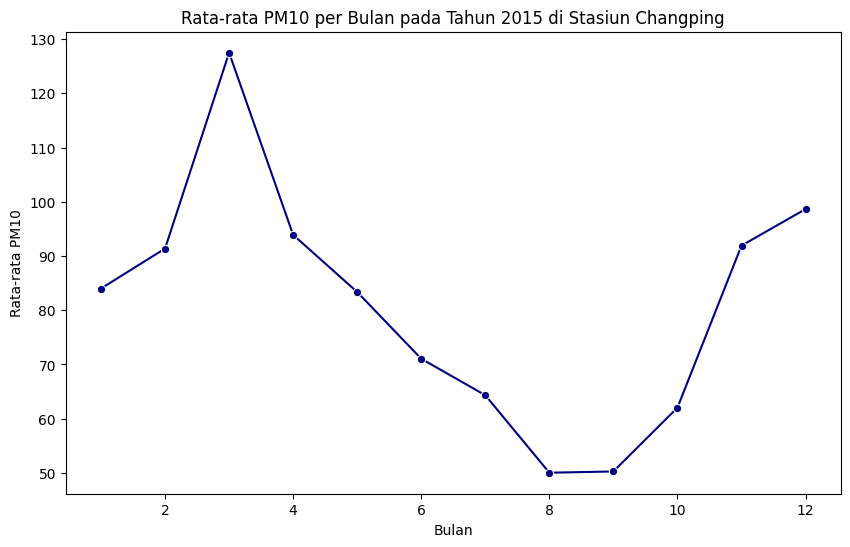

In [24]:
# Filter data untuk tahun 2015
Changping_df_2015 = Changping_df[Changping_df['year'] == 2015]

# Hitung rata-rata PM10 untuk setiap bulan
monthly_avg_pm10 = Changping_df_2015.groupby('month')['PM10'].mean()

# Plot rata-rata PM10 per bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_pm10.index, y=monthly_avg_pm10.values, marker='o', color='navy')
plt.title('Rata-rata PM10 per Bulan pada Tahun 2015 di Stasiun Changping')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM10')
plt.show()

4. Melihat distribusi frekuensi data yang diwakili sumbu x menunjukkan nilai PM10, sedangkan sumbu y menunjukkan frekuensi berapa kali nilai-nilai tersebut muncul dalam dataframe Stasiun Changping pada tahun 2015.

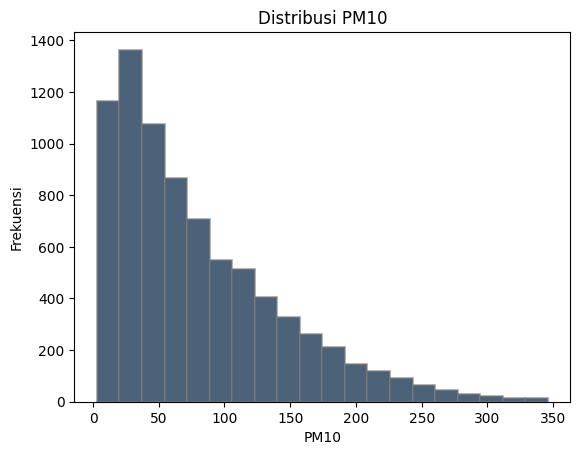

In [25]:
plt.hist(Changping_df_2015['PM10'], bins=20, color='#001F3F', alpha=0.7, edgecolor='#808080', linewidth=1.2)
plt.title('Distribusi PM10')
plt.xlabel('PM10')
plt.ylabel('Frekuensi')
plt.show()

5. Baris program ini menghitung RFQ (Recency, Frequency, Quality) analisis dari data PM10 untuk stasiun Changping.
    - Recency: Menghitung bulan terbaru dalam data.
    - Frequency: Menghitung jumlah pengamatan PM10 yang diukur dalam setiap bulan.
    - Quality: Menghitung rata-rata PM10 dalam setiap bulan.

In [26]:
# Menghitung Recency (bulan terbaru)
recency = Changping_df['month'].max()

# Menghitung Frequency (jumlah kali {PM10} diukur dalam setiap bulan)
frequency = Changping_df.groupby('month')['PM10'].size()  # Menggunakan size() untuk menghitung jumlah pengamatan

# Menghitung Quality (rata-rata {PM10} dalam setiap bulan)
quality = Changping_df.groupby('month')['PM10'].mean()

# Menggabungkan hasil analisis RFQ ke dalam satu DataFrame
rfq_analysis = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Quality': quality
})

print(rfq_analysis)

       Recency  Frequency     Quality
month                                
1           12       2332   77.921484
2           12       2300   74.126739
3           12       2673  112.756341
4           12       2725  103.130826
5           12       2714   89.113965
6           12       2685   71.993929
7           12       2674   72.221765
8           12       2784   58.937284
9           12       2803   66.248484
10          12       2793   88.794629
11          12       2655   95.091714
12          12       2405   82.647019


### Explore Data Stasiun Dongsi

##### Melakukan perhitungan statistik deskriptif

1. Menghitung statistik deskriptif dari dataframe Dongsi_df mencakup informasi ringkasan berbagai nilai statistik seperti jumlah, mean (rata-rata), standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom dalam DataFrame tersebut. 

In [27]:
descriptive_stats = Dongsi_df.describe()
print(descriptive_stats)

                 No          year         month           day          hour  \
count  32230.000000  32230.000000  32230.000000  32230.000000  32230.000000   
mean   17687.135991   2014.678684      6.541111     15.741669     11.433913   
std    10094.407870      1.176904      3.385036      8.780369      6.919534   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9167.250000   2014.000000      4.000000      8.000000      5.000000   
50%    17804.500000   2015.000000      7.000000     16.000000     11.000000   
75%    26505.750000   2016.000000      9.000000     23.000000     17.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32230.000000  32230.000000  32230.000000  32230.000000  32230.000000   
mean      75.869120     97.586922     16.041079     51.559929   1186.614086   
std       67.423877     75.568640     17.354611    

2. Menampilkan 5 data dari bagian awal, tengah, serta akhir dataframe untuk validasi pemahaman akan data

In [28]:
print(Dongsi_df.head())
print(Dongsi_df.tail())
print(Dongsi_df.info())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  4.0  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0  250.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0  21.5  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan kondisi kualitas udara berdasarkan data PM10 pada setiap bulannya di tahun 2015 yang terjadi di Stasiun Changping?


1.1. Memvisualisasikan hasil analisis RFQ divisualisasikan dalam bar chart, menunjukkan frekuensi pengukuran PM10 per bulan.

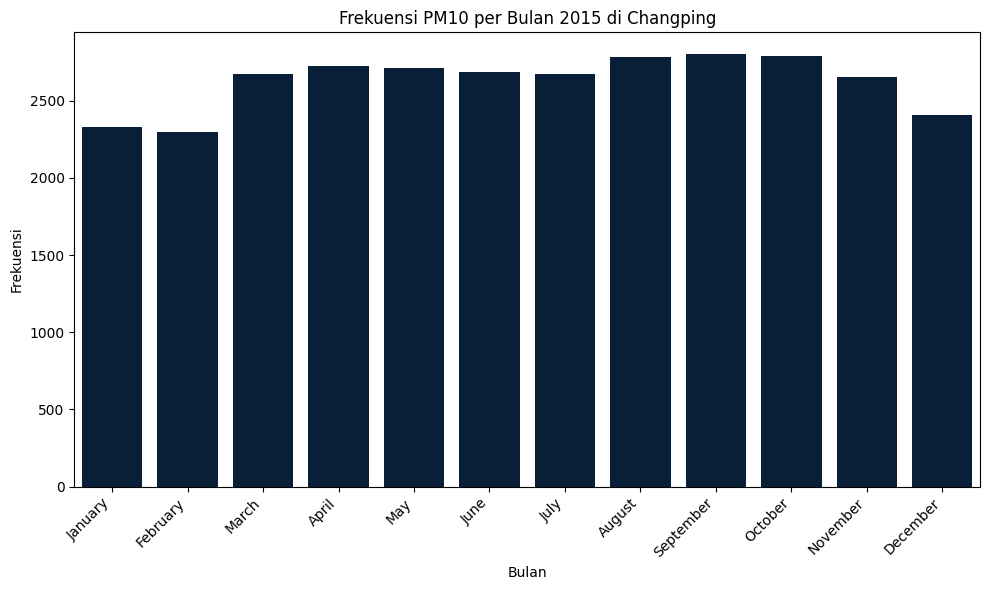

In [29]:
# Visualisasi Frekuensi PM10 per Bulan
plt.figure(figsize=(10, 6))
sns.barplot(data=rfq_analysis, x=rfq_analysis.index, y='Frequency', color='#001F3F')
plt.title('Frekuensi PM10 per Bulan 2015 di Changping')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')

# Mengubah label bulan menjadi nama bulan
plt.xticks(ticks=range(12), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45, ha='right')

plt.tight_layout()
plt.show()

1.2 Memvisualisasikan rata-rata tingkat PM10 per bulan pada tahun 2015 di stasiun Changping.

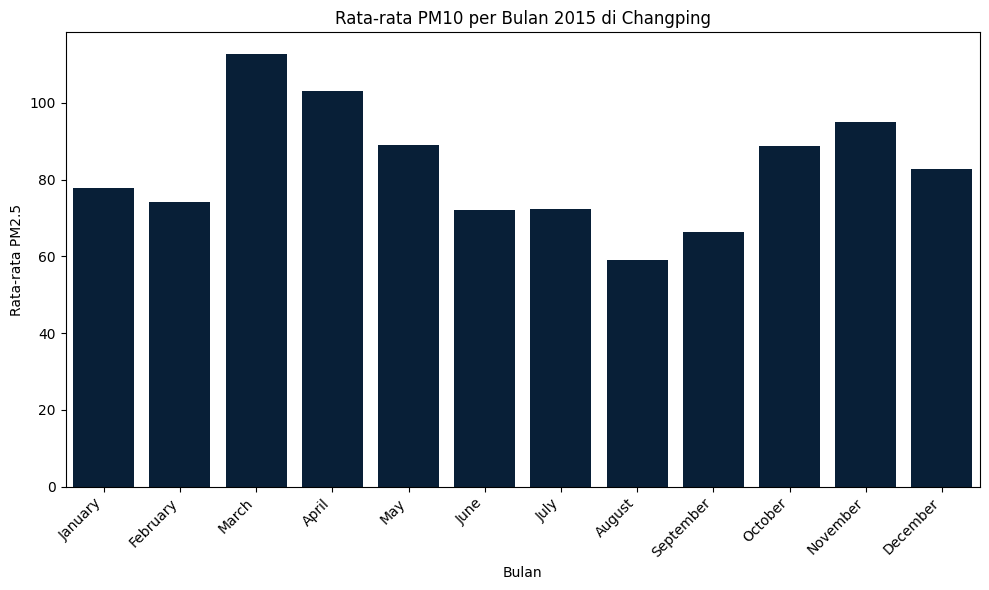

In [30]:
# Visualisasi Rata-rata PM2.5 per Bulan
plt.figure(figsize=(10, 6))
sns.barplot(data=rfq_analysis, x=rfq_analysis.index, y='Quality', color='#001F3F')
plt.title('Rata-rata PM10 per Bulan 2015 di Changping')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')

# Mengubah label bulan menjadi nama bulan
plt.xticks(ticks=range(12), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45, ha='right')

plt.tight_layout()
plt.show()

1.3 Memvisualisasikan perubahan kualitas udara seiring waktu, khususnya perubahan rata-rata PM10 per bulan pada tahun 2015 di stasiun pengukuran udara Changping.

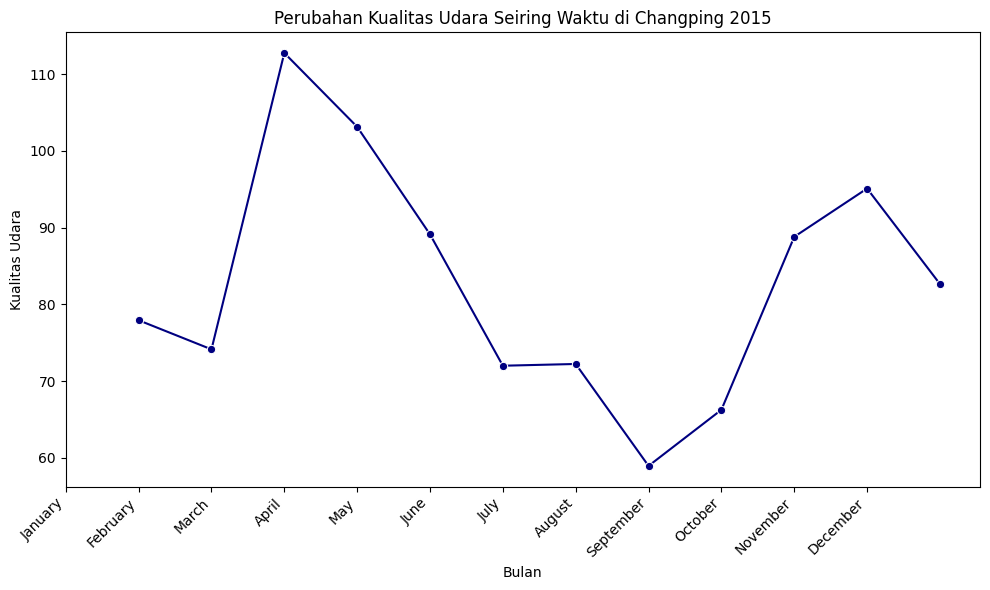

In [31]:
# Visualisasi Perubahan Kualitas Udara Seiring Waktu
plt.figure(figsize=(10, 6))
sns.lineplot(data=rfq_analysis, x=rfq_analysis.index, y='Quality', marker='o', color='navy')
plt.title('Perubahan Kualitas Udara Seiring Waktu di Changping 2015')
plt.xlabel('Bulan')
plt.ylabel('Kualitas Udara')

# Mengubah label bulan menjadi nama bulan
plt.xticks(ticks=range(12), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45, ha='right')

plt.tight_layout()
plt.show()

1.4 Menggunakan Plot tren bulanan lalu mencari nilai tertinggi dan terendah dari rata-rata PM10

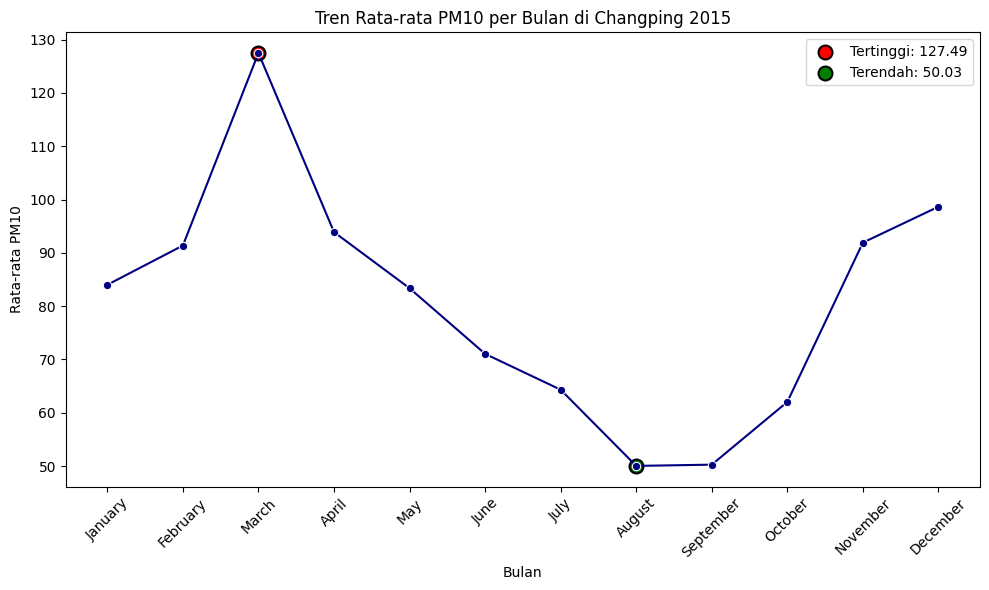

In [32]:
# Hitung rata-rata PM10 untuk setiap bulan
monthly_avg_pm10 = Changping_df_2015.groupby('month')['PM10'].mean()

# Temukan bulan dengan rata-rata PM10 tertinggi dan terendah
bulan_tertinggi = monthly_avg_pm10.idxmax()
nilai_tertinggi = monthly_avg_pm10.max()
bulan_terendah = monthly_avg_pm10.idxmin()
nilai_terendah = monthly_avg_pm10.min()

# Buat plot tren bulanan
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_pm10.index, y=monthly_avg_pm10.values, marker='o', color='navy')
plt.title('Tren Rata-rata PM10 per Bulan di Changping 2015')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM10')

# Tambahkan titik untuk data tertinggi dan terendah dengan penyesuaian ukuran dan warna
plt.scatter(x=bulan_tertinggi, y=nilai_tertinggi, color='red', label=f'Tertinggi: {nilai_tertinggi:.2f}', s=100, edgecolor='black', linewidth=1.5)
plt.scatter(x=bulan_terendah, y=nilai_terendah, color='green', label=f'Terendah: {nilai_terendah:.2f}', s=100, edgecolor='black', linewidth=1.5)

# Tampilkan legenda
plt.legend()

# Mengubah label bulan menjadi nama bulan
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)], rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana perbandingan kadar karbon monoksida pada udara di Stasiun Changping dan Stasiun Dongsi


2.1 Menghitung rata-rata kadar CO di dua stasiun pengukuran udara, yaitu Changping dan Dongsi, dan kemudian memvisualisasikan perbandingan rata-rata kadar CO.

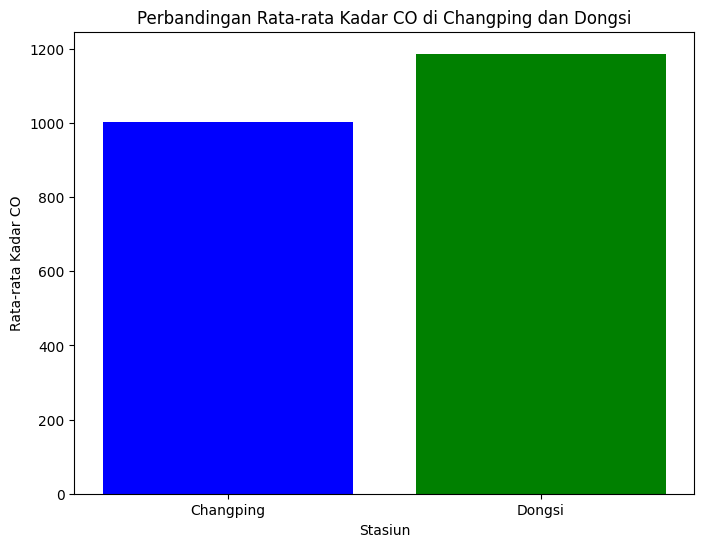

In [33]:

# Menghitung rata-rata CO
mean_co_changping = Changping_df['CO'].mean()
mean_co_dongsi = Dongsi_df['CO'].mean()

# Visualisasi perbandingan rata-rata CO
plt.figure(figsize=(8, 6))
plt.bar(['Changping', 'Dongsi'], [mean_co_changping, mean_co_dongsi], color=['blue', 'green'])
plt.title('Perbandingan Rata-rata Kadar CO di Changping dan Dongsi')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata Kadar CO')
plt.show()

2.2 Memvisualisasikan distribusi frekuensi kadar CO di masing-masing stasiun untuk memahami variasi dalam kualitas udara di dua lokasi yang berbeda.

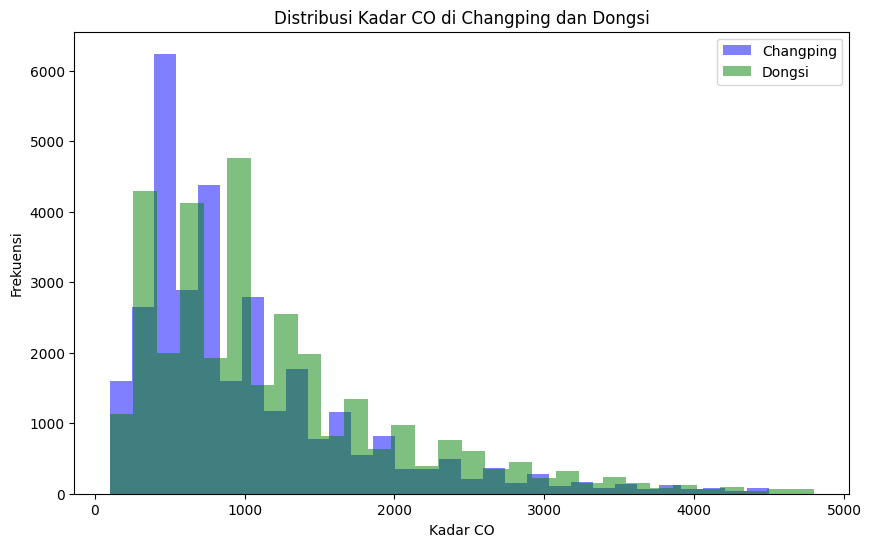

In [34]:
# Visualisasi distribusi CO menggunakan histogram
plt.figure(figsize=(10, 6))
plt.hist(Changping_df['CO'], bins=30, alpha=0.5, label='Changping', color='blue')
plt.hist(Dongsi_df['CO'], bins=30, alpha=0.5, label='Dongsi', color='green')
plt.title('Distribusi Kadar CO di Changping dan Dongsi')
plt.xlabel('Kadar CO')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

2.3 Mengelompokkan data per tahun dan menghitung rata-rata kadar CO untuk masing-masing stasiun (Changping dan Dongsi). Memvisualisasikan tren waktu per tahun dari rata-rata kadar CO di kedua stasiun, Changping dan Dongsi.

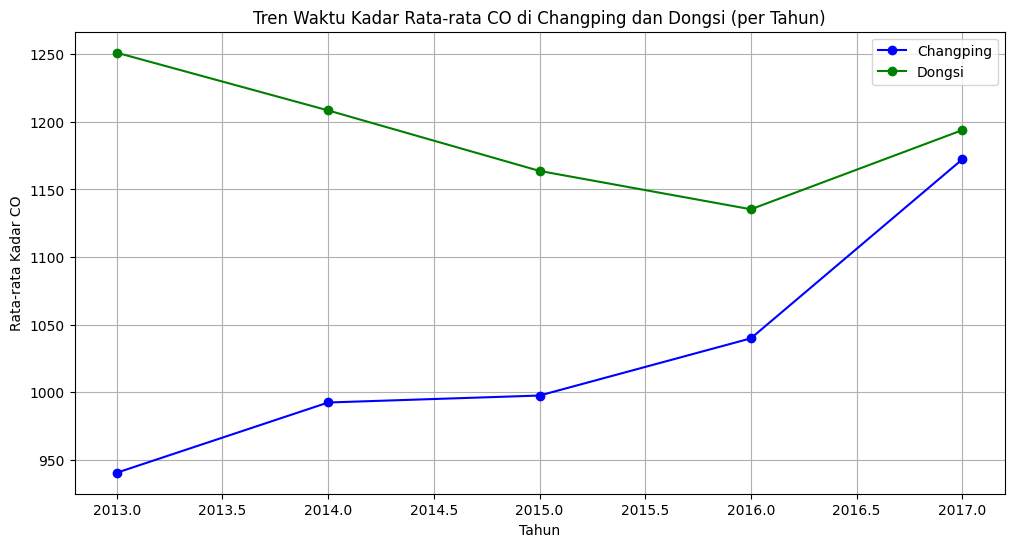

In [35]:
# Mengubah kolom 'year', 'month', dan 'day' menjadi tipe data datetime
Changping_df['date'] = pd.to_datetime(Changping_df[['year', 'month', 'day']])
Dongsi_df['date'] = pd.to_datetime(Dongsi_df[['year', 'month', 'day']])

# Mengelompokkan data per tahun dan menghitung rata-rata CO
Changping_yearly = Changping_df.groupby(Changping_df['date'].dt.year)['CO'].mean()
Dongsi_yearly = Dongsi_df.groupby(Dongsi_df['date'].dt.year)['CO'].mean()

# Visualisasi tren waktu per tahun
plt.figure(figsize=(12, 6))
plt.plot(Changping_yearly.index, Changping_yearly.values, label='Changping', color='blue', marker='o')
plt.plot(Dongsi_yearly.index, Dongsi_yearly.values, label='Dongsi', color='green', marker='o')
plt.title('Tren Waktu Kadar Rata-rata CO di Changping dan Dongsi (per Tahun)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Kadar CO')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana hubungan antara tingkat polusi udara (diwakili oleh PM2.5 dan PM10) dengan suhu udara (TEMP) pada bulan September 2014 hingga Juni 2015 pada Stasiun Dongsi



3.1 Memvisualisasikan hubungan antara temperatur dan tingkat polusi udara (PM2.5 dan PM10) di stasiun Dongsi selama periode tertentu, membantu dalam memahami dampak temperatur terhadap kualitas udara pada rentang waktu yang ditentukan.

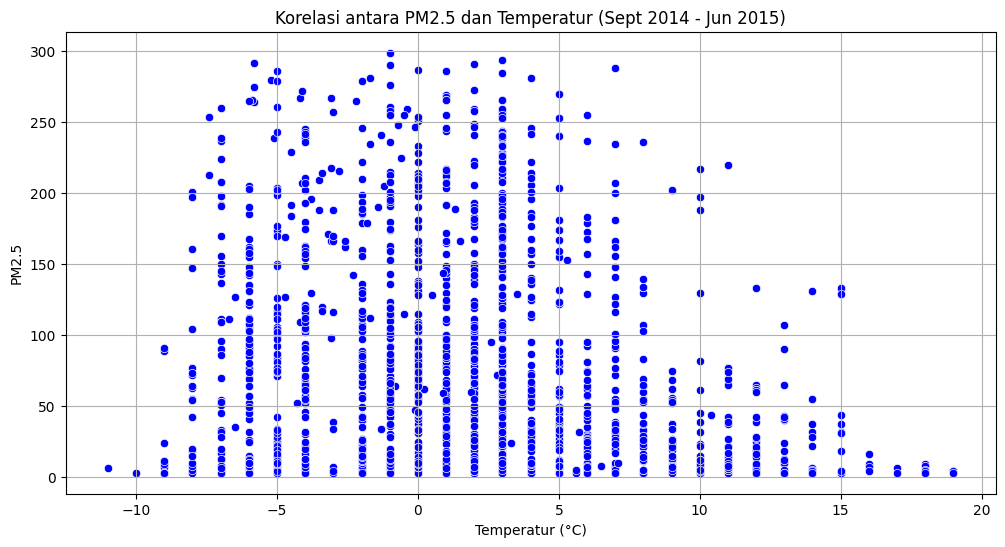

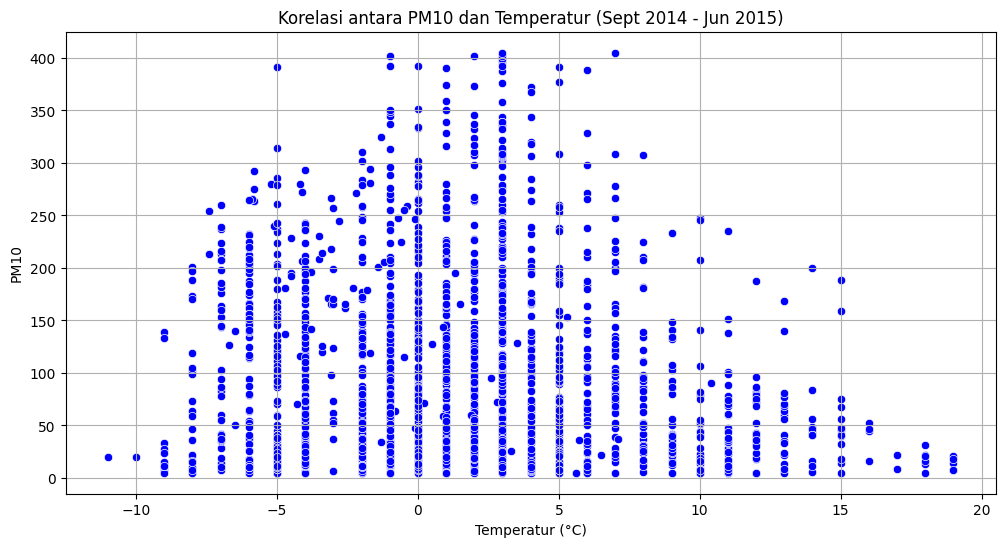

In [36]:
start_date = '2014-11-01'
end_date = '2015-01-28'  # Mengubah 30 menjadi 28 karena Februari hanya memiliki 28 hari
filtered_df = Dongsi_df[(Dongsi_df['date'] >= start_date) & (Dongsi_df['date'] <= end_date)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=filtered_df, color='blue')
plt.title('Korelasi antara PM2.5 dan Temperatur (Sept 2014 - Jun 2015)')
plt.xlabel('Temperatur (°C)')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TEMP', y='PM10', data=filtered_df, color='blue')
plt.title('Korelasi antara PM10 dan Temperatur (Sept 2014 - Jun 2015)')
plt.xlabel('Temperatur (°C)')
plt.ylabel('PM10')
plt.grid(True)
plt.show()

3.2 Memvisualisasikan perubahan seiring waktu dalam tingkat polusi udara PM2.5 dan PM10 terhadap temperatur di stasiun Dongsi

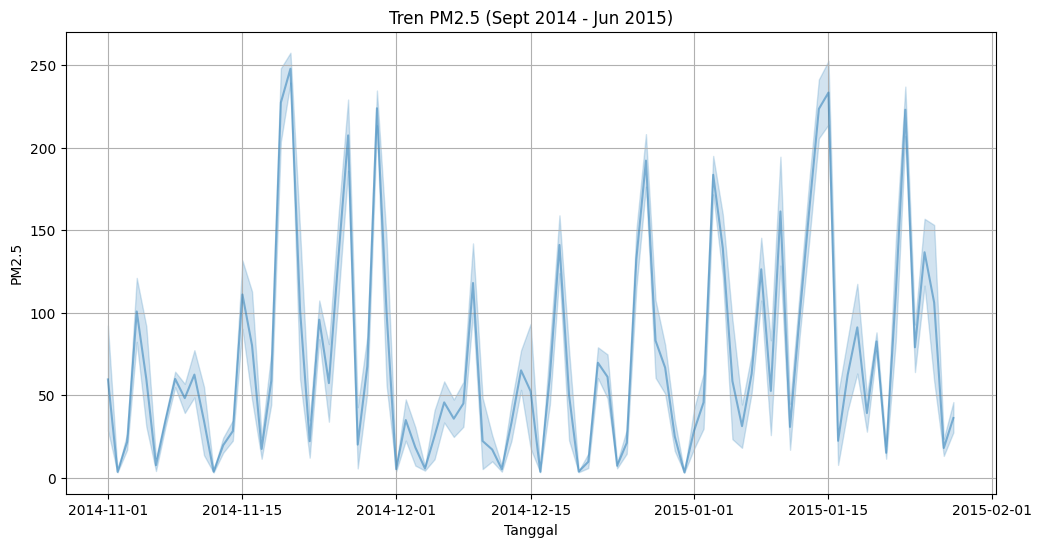

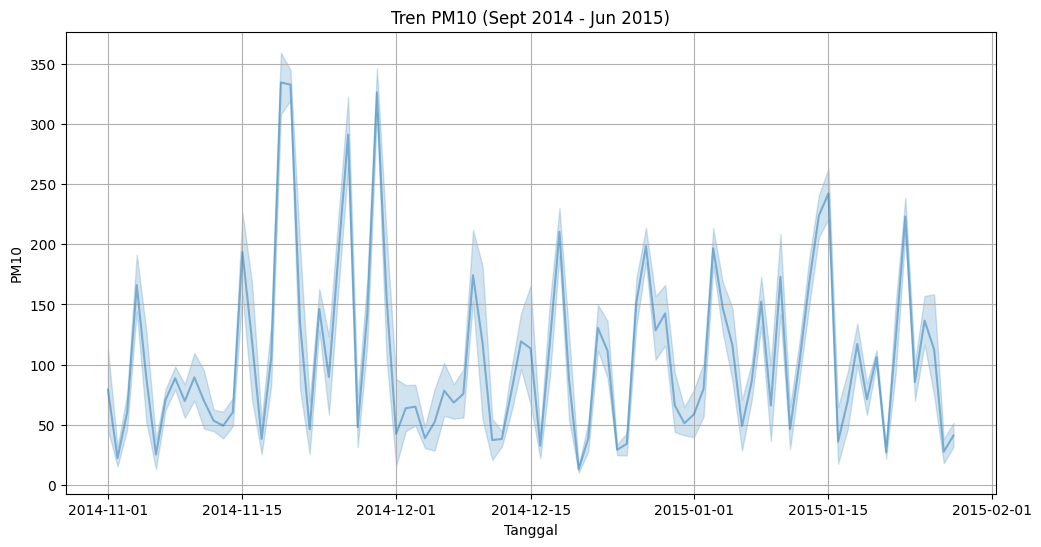

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='PM2.5', data=filtered_df, alpha=0.5)
plt.title('Tren PM2.5 (Sept 2014 - Jun 2015)')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='PM10', data=filtered_df, alpha=0.5)
plt.title('Tren PM10 (Sept 2014 - Jun 2015)')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.grid(True)
plt.show()

3.3  Memvisualisasikan hubungan antara tingkat polusi udara (PM2.5 dan PM10) dengan suhu udara selama rentang waktu tertentu (September 2014 hingga Juni 2015) di stasiun Dongsi.

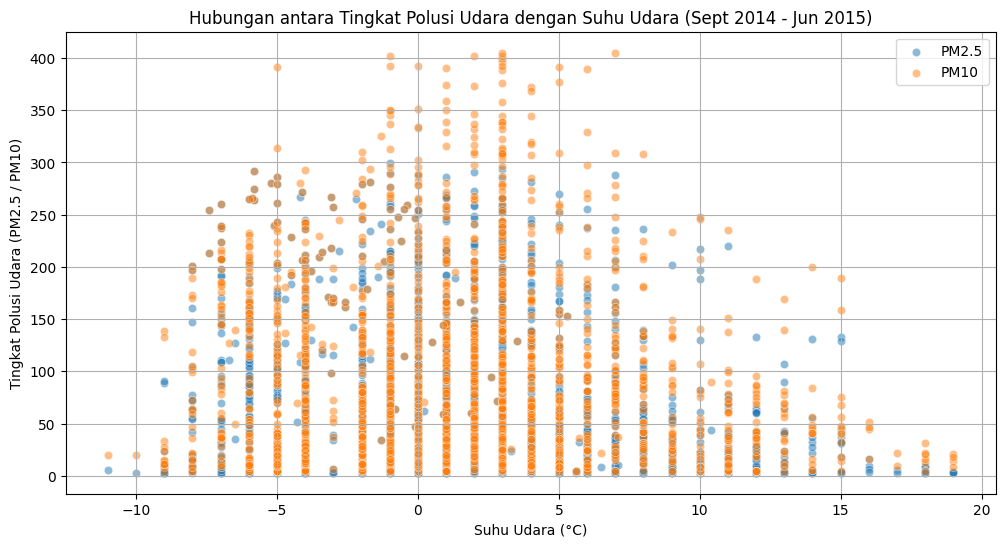

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=filtered_df, label='PM2.5', alpha=0.5)
sns.scatterplot(x='TEMP', y='PM10', data=filtered_df, label='PM10', alpha=0.5)
plt.title('Hubungan antara Tingkat Polusi Udara dengan Suhu Udara (Sept 2014 - Jun 2015)')
plt.xlabel('Suhu Udara (°C)')
plt.ylabel('Tingkat Polusi Udara (PM2.5 / PM10)')
plt.legend()
plt.grid(True)
plt.show()

3.4 Menghitung matriks korelasi antara variabel PM2.5, PM10, dan suhu udara (TEMP) dari DataFrame yang telah difilter (filtered_df).

Correlation Matrix:
          PM2.5      PM10      TEMP
PM2.5  1.000000  0.929506 -0.147715
PM10   0.929506  1.000000 -0.098911
TEMP  -0.147715 -0.098911  1.000000


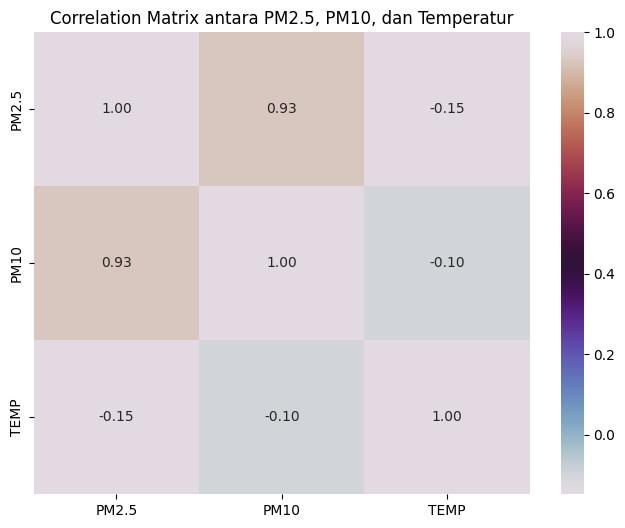

In [39]:
correlation_matrix = filtered_df[['PM2.5', 'PM10', 'TEMP']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualisasi correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt=".2f")
plt.title('Correlation Matrix antara PM2.5, PM10, dan Temperatur')
plt.show()

## Conclusion

- Berdasarkan analisis Data tersebut, dapat diketahui bahwa terdapat perubahan kondisi kualitas udara yang cukup signifikan pada data PM10 di setiap bulannya pada tahun 2015 di Stasiun Changping. Kualitas udara terendah terjadi pada bulan Maret 2015 dan kualitas udara terbaik terjadi pada bulan Agustus 2015. Selanjutnya data dapat dianalis lebih lanjut dengan parameter lain seperti fitur Rain untuk mencari tahu korelasi sebagai salah satu kemungkinan penyebab tinggi rendahnya kualitas udara

- Berdasarkan visualisasi dan analisis data, dapat diketahui bahwa kadar CO atau karbon monoksida di Stasiun Changping dan Stasiun Dongsi memiliki perbedaan yang cukup jauh pada tahun 2013, namun semakin rendah perbedaanya pada thaun 2017.

- Korelasi atau hubungan antara kualitas udara yang direpresentasikan dengan fitur PM2.5 dan PM10 terhadap temperatur menunjukkan hubungan korelasi negative.